<a href="https://colab.research.google.com/github/santyxd3000/AppliedDataScience-Taller1/blob/main/Taller1_AppliedDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TALLER 1 - CIENCIA DE DATOS APLICADA

Santiago Iván Pardo Morales

Dataset escogido: Amsterdam, North Holland, the Netherlands - https://insideairbnb.com/amsterdam/



In [15]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1acf568a84c353c960ffbedbb3e2d7130f5b56b12bdcf1661b9afade0a1c7508
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [75]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## CARGAR LOS DATOS

In [9]:
listings_df = pd.read_csv("listings.csv")

## ENTENDIMIENTO DE LOS DATOS

In [10]:
#Mirar número de datos y variables
listings_df.shape

(9310, 75)

Podemos ver que se van a analizar como máximo 9310 datos, cada uno con 75 variables

In [13]:
#Mirar tipos de datos
listings_df.dtypes

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
source,object
name,object
description,object
neighborhood_overview,object
picture_url,object
host_id,int64


In [12]:
listings_df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3197,31895639,https://www.airbnb.com/rooms/31895639,20240610194833,2024-06-11,city scrape,Sunny Apartment (City Centre),Our apartment is on the 3rd/4rd floor of an ol...,It is a quiet neighborhood but far from boring...,https://a0.muscache.com/pictures/33d20f9f-4fa7...,234692994,https://www.airbnb.com/users/show/234692994,Hein,2019-01-06,Netherlands,NaN,a few days or more,0%,0%,f,https://a0.muscache.com/im/pictures/user/98c55...,https://a0.muscache.com/im/pictures/user/98c55...,Oosterparkbuurt,1,1,"['email', 'phone']",t,t,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,NaN,52.359210,4.908180,Entire condo,Entire home/apt,2,1.5,1.5 baths,1.0,3.0,"[""Iron"", ""Shampoo"", ""Patio or balcony"", ""Paid ...",$225.00,3,4,3,4,4,4,3.0,4.0,NaN,t,0,14,14,14,2024-06-11,1,0,0,2019-06-10,2019-06-10,5.00,5.0,5.00,5.0,5.0,5.00,5.00,0363 34F0 11E9 8B7D 7E40,f,1,1,0,0,0.02
8969,1135500278684799303,https://www.airbnb.com/rooms/1135500278684799303,20240610194833,2024-06-11,city scrape,Deluxe room overlooking IJ river in Adam Tower,With its bold presence in Amsterdam’s A’DAM To...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,548528525,https://www.airbnb.com/users/show/548528525,"Sir Adam, Part Of Sircle Colle",2023-11-28,NaN,"Welcome to Sir Adam, one of Amsterdam's most i...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/02ec3...,https://a0.muscache.com/im/pictures/user/02ec3...,NaN,7,7,"['email', 'phone']",t,t,NaN,Oud-Noord,NaN,52.384097,4.902861,Room in hotel,Private room,2,1.0,1 private bath,1.0,NaN,"[""Iron"", ""Paid parking on premises"", ""Air cond...",$286.00,1,365,1,3,28,731,1.1,515.7,NaN,t,28,58,88,111,2024-06-11,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exempt,t,7,0,7,0,NaN
3230,32234536,https://www.airbnb.com/rooms/32234536,20240610194833,2024-06-11,city scrape,Wittenberg by Cove One Bedroom Superior Apartment,This bright and airy apartment boasts views of...,Neighbourhood: Plantage<br />A short cycle eas...,https://a0.muscache.com/pictures/d06ff95e-0a06...,241644101,https://www.airbnb.com/users/show/241644101,Wittenberg,2019-02-07,"Amsterdam, Netherlands",Wittenberg by Cove is a monumental short stay ...,within a few hours,76%,98%,f,https://a0.muscache.com/im/pictures/user/fb79a...,https://a0.muscache.com/im/pictures/user/fb79a...,NaN,15,15,"['email', 'phone', 'work_email']",t,f,"Amsterdam, Nord Holland, Netherlands",Centrum-Oost,NaN,52.365360,4.908980,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Iron"", ""Backyard"", ""Shampoo"", ""Paid parking ...",$291.00,7,99,7,7,180,180,7.0,180.0,NaN,t,30,56,86,359,2024-06-11,1,1,0,2023-08-21,2023-08-21,5.00,5.0,5.00,5.0,5.0,4.00,4.00,Exempt,t,15,15,0,0

In [18]:
#Reporte de perfilamiento - para ejecutarlo se debe descomentar
#report = ProfileReport(listings_df)
#report.to_file("report_amsterdam.html")

### REVISIÓN DE CALIDAD DE LOS DATOS

Se va a revisar completitud, unicidad y consistencia de todos los datos

In [29]:
#Completitud: valores nulos por cada columna
print("\nAnálisis de Completitud:")
null_values_by_column = listings_df.isnull().sum()
null_percentage_by_column = (null_values_by_column / len(listings_df)) * 100
completitud = pd.DataFrame({
    'Valores nulos': null_values_by_column,
    'Porcentaje': null_percentage_by_column
})
print(completitud.sort_values(by='Porcentaje', ascending=False))


Análisis de Completitud:
                                              Valores nulos  Porcentaje
neighbourhood_group_cleansed                           9310  100.000000
calendar_updated                                       9310  100.000000
host_neighbourhood                                     6377   68.496241
host_about                                             4289   46.068743
neighborhood_overview                                  3743   40.204082
neighbourhood                                          3743   40.204082
beds                                                   3456   37.121375
price                                                  3407   36.595059
bathrooms                                              3407   36.595059
host_response_time                                     2897   31.117078
host_response_rate                                     2897   31.117078
host_acceptance_rate                                   1621   17.411386
host_location                         

In [24]:
#Unicidad - identificar datos duplicados
duplicates = listings_df.duplicated()
print(f"\nNúmero de Datos Duplicados: {duplicates.sum()}")


Número de Datos Duplicados: 0


Por ende, no existen datos que contengan exactamente los mismos valores duplicados

In [25]:
#Consistencia - revisar los tipos de dato y más detalles

9310

In [30]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9310 non-null   int64  
 1   listing_url                                   9310 non-null   object 
 2   scrape_id                                     9310 non-null   int64  
 3   last_scraped                                  9310 non-null   object 
 4   source                                        9310 non-null   object 
 5   name                                          9310 non-null   object 
 6   description                                   8952 non-null   object 
 7   neighborhood_overview                         5567 non-null   object 
 8   picture_url                                   9310 non-null   object 
 9   host_id                                       9310 non-null   i

### RESUMEN BÁSICO - ENTENDIMIENTO DE LOS DATOS

Con base en el reporte de perfilamiento obtenido como en el análisis de calidad de datos, se puede decir esto:

* Existen aproximadamente 37 valores numéricos y 28 categóricos (los demás datos se catalogan como DateTime, booleanos o no soportados por la herramienta)

* El dataset contiene un total de un 9.5% de valores nulos

* No existen datos que sean exactamente iguales, sin embargo, no se descarta la posibilidad de que si los haya cuando se identifiquen los valores más importantes en el contexto del negocio

* Variables como neighborhood_group_cleansed y calendar_updated tienen un 100% de valores nulos con respecto a todos sus datos, por lo cual no serán tenidas en cuenta en el análisis



Basado en el análisis realizado en el entendimiento de los datos, y considerando los objetivos de negocio del análisis, se escogerán los siguientes 6 datos:

neighbourhood_cleansed, price, latitude, longitude, review_score_value, accommodates

In [42]:
important_df = listings_df[["neighbourhood_cleansed", "price", "latitude", "longitude", "review_scores_value", "accommodates"]]

In [43]:
important_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  9310 non-null   object 
 1   price                   5903 non-null   object 
 2   latitude                9310 non-null   float64
 3   longitude               9310 non-null   float64
 4   review_scores_value     8312 non-null   float64
 5   accommodates            9310 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 436.5+ KB


In [44]:
important_df

,neighbourhood_cleansed,price,latitude,longitude,review_scores_value,accommodates
0,Centrum-Oost,$200.00,52.359310,4.898440,4.66,4
1,Westerpark,NaN,52.391850,4.886900,4.48,16
2,Centrum-Oost,$155.00,52.358710,4.896160,5.00,2
3,Centrum-Oost,NaN,52.359720,4.897500,4.64,2
4,Centrum-West,NaN,52.371040,4.877130,4.61,2
...,...,...,...,...,...,...
9305,De Baarsjes - Oud-West,$120.00,52.363077,4.856098,NaN,2
9306,De Baarsjes - Oud-West,$310.00,52.361953,4.861518,NaN,2
9307,Noord-West,$180.00,52.417498,4.884009,NaN,3
9308,Centrum-West,$280.00,52.368450,4.882472,NaN,2


### PEQUEÑA LIMPIEZA
Se realizará una pequeña limpieza para convertir a la variable price en numérica, dado que actualmente se está reconociendo como categórica



In [45]:
listings_df["price"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

## ANÁLISIS UNIVARIADO

### PARA PRICE

Se realizó un histograma para la frecuencia de price sin tener en cuenta posibles outliers que se encuentren en el dataset, para ello se identificaron con el método de rangos intercuartiles.

In [50]:
q1 = listings_df["price"].quantile(0.25)
q3 = listings_df["price"].quantile(0.75)
price_iqr = q3 - q1

[]

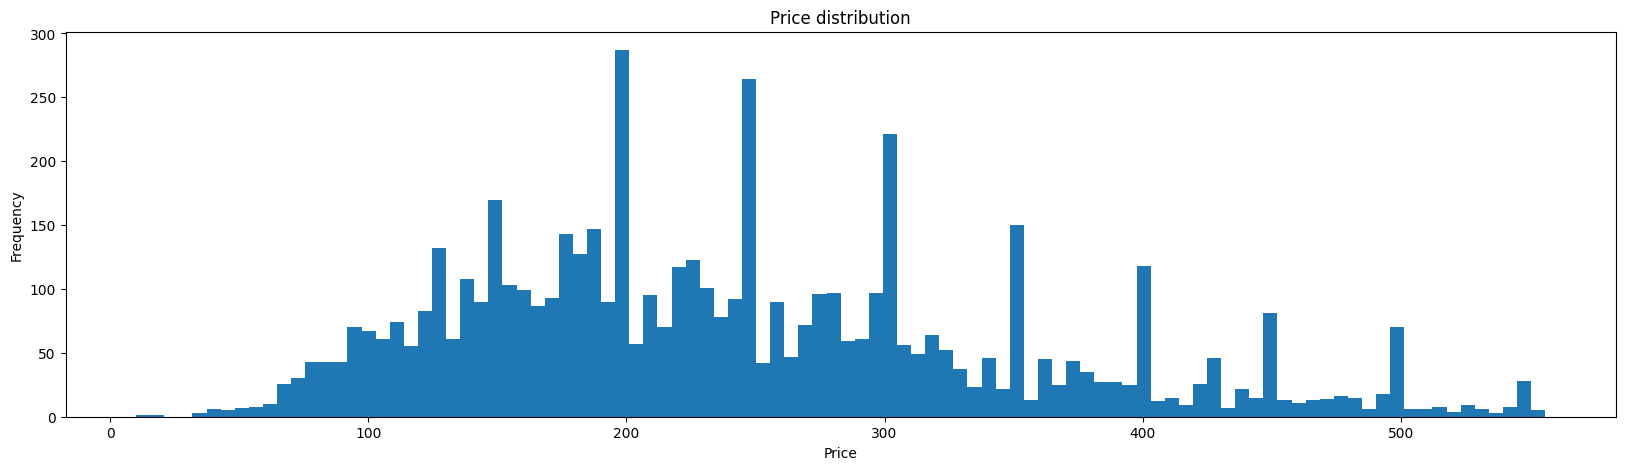

In [61]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price"] <= (q3 + 1.5*price_iqr)]["price"], bins=100)
plt.title("Price distribution")
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.plot()

In [55]:
listings_df["price"].describe()

,price
count,5903.000000
mean,291.624428
std,1211.726050
min,10.000000
25%,168.000000
50%,235.000000
75%,323.500000
max,91466.000000


Basado en el histograma y la descripción de los datos, se puede afirmar que los Airbnb en Amsterdam suelen costar comúnmente 200 euros, sin embargo, también es común encontrar precios más altos hacia los 250-300 euros

Podemos observar que la desviación estándar es muy grande, por lo que es evidente la presencia de outliers

### PARA NEIGHBOURHOOD_CLEANSED

Se grafico primero un word cloud con las palabras más recurridas de los vecindarios

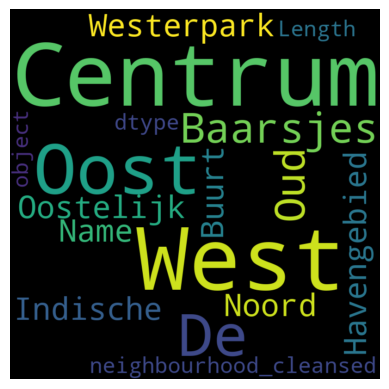

In [78]:
text = listings_df["neighbourhood_cleansed"]
wordcloud = WordCloud(width=800, height=800, background_color="black", stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [83]:
neighbourhood_counts = listings_df["neighbourhood_cleansed"].value_counts()

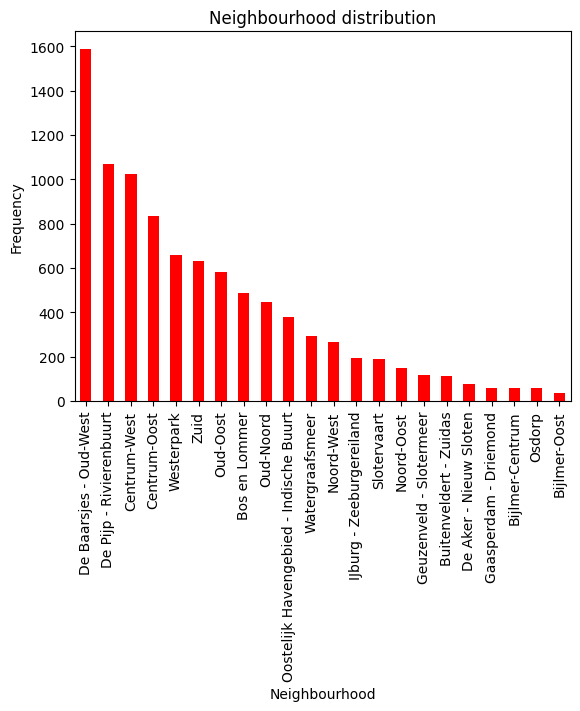

In [86]:
neighbourhood_counts.plot(kind='bar', color='red')
plt.title("Neighbourhood distribution")
plt.ylabel("Frequency")
plt.xlabel("Neighbourhood")
plt.xticks(rotation=90)
plt.show()

Podemos ver que el sector "De Baarsjes - Oud West" contiene la mayor cantidad de Airbnb en Amsterdam

### PARA LATITUDE

En este caso no se tuvo en cuenta los outliers puesto que la latitud en Amsterdam tiene un límite definido

[]

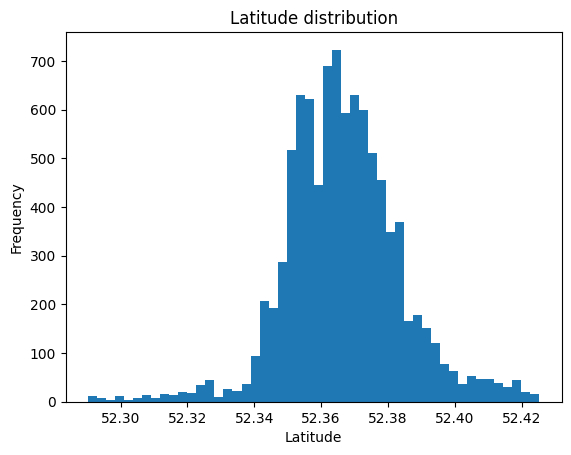

In [62]:
listings_df["latitude"].plot.hist(bins=50)
plt.title("Latitude distribution")
plt.ylabel("Frequency")
plt.xlabel("Latitude")
plt.plot()

In [59]:
listings_df["latitude"].describe()

,latitude
count,9310.000000
mean,52.366518
std,0.017430
min,52.290340
25%,52.355485
50%,52.365560
75%,52.376390
max,52.425159


Basado en el histograma y asumiendo que corresponde al límite geográfico de Amsterdam, se puede afirmar que muchos apartamentos se encuentran en el centro de Amsterdam

### PARA LONGITUDE

En este caso no se tuvo en cuenta los outliers puesto que la longitud en Amsterdam tiene un límite definido

[]

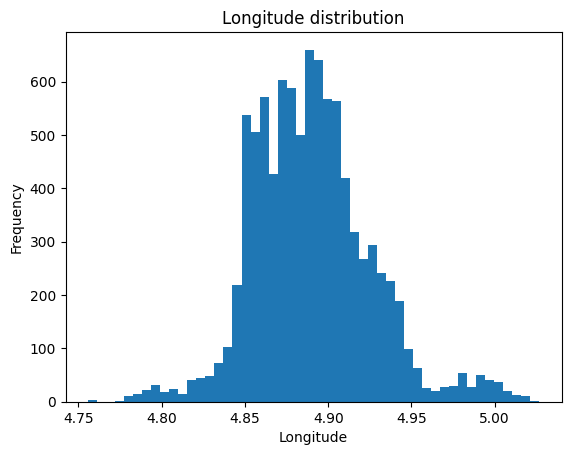

In [63]:
listings_df["longitude"].plot.hist(bins=50)
plt.title("Longitude distribution")
plt.ylabel("Frequency")
plt.xlabel("Longitude")
plt.plot()

In [72]:
listings_df["longitude"].describe()

,longitude
count,9310.000000
mean,4.889940
std,0.035673
min,4.755870
25%,4.864784
50%,4.887848
75%,4.909250
max,5.026669


Con la gráfica de longitud, también se puede afirmar que muchos Airbnb se encuentran en el centro de Amsterdam

### PARA ACCOMMODATES

De igual forma, no se identificaron outliers puesto que en esta gráfica se logra observar bien el número mínimo de personas acomodadas y el número máximo de personas acomodadas

[]

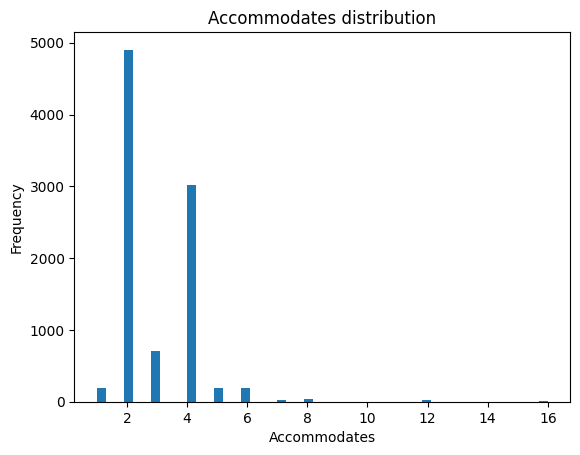

In [66]:
listings_df["accommodates"].plot.hist(bins=50)
plt.title("Accommodates distribution")
plt.ylabel("Frequency")
plt.xlabel("Accommodates")
plt.plot()

In [67]:
listings_df["accommodates"].describe()

,accommodates
count,9310.000000
mean,2.937164
std,1.365373
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,16.000000


Basado en el histograma, se puede observar que de forma general, hay una mayor cantidad de Airbnb que ofrecen acomodaciones de 2 personas, también es común ver acomodaciones de 4 personas.

### PARA REVIEW_SCORE_VALUES

No se hizo una detección de outliers ya que las calificaciones tienen un límite definido entre 1 y 5

[]

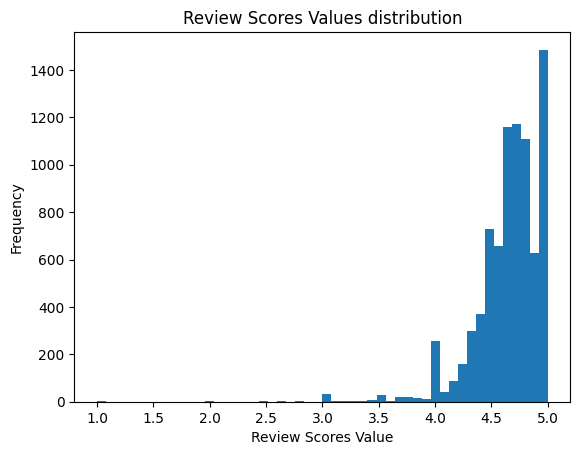

In [70]:
listings_df["review_scores_value"].plot.hist(bins=50)
plt.title("Review Scores Values distribution")
plt.ylabel("Frequency")
plt.xlabel("Review Scores Value")
plt.plot()

In [71]:
listings_df["review_scores_value"].describe()

,review_scores_value
count,8312.000000
mean,4.652007
std,0.308807
min,1.000000
25%,4.500000
50%,4.700000
75%,4.840000
max,5.000000


Basado en el histograma, se puede observar que los Airbnb que ofrece Amsterdam tienen muy buenas calificaciones, ya que la gran mayoría se encuentra por encima del 4.5/5